In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.metrics import mean_squared_log_error as msle
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [51]:
dataset=pd.read_csv("AirPassengers.csv")
# dataset.drop(columns="Unnamed: 0",inplace=True)
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [52]:
dataset["Month"]=pd.to_datetime(dataset["Month"],format="%Y-%m")
dataset.set_index(dataset["Month"],inplace=True)
dataset.drop(columns="Month",inplace=True)
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [53]:
train_data,valid_data=dataset.loc[:"1957-12-01"]["#Passengers"],dataset.loc["1958-01-01":]["#Passengers"]

In [54]:
train_data

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
Name: #Passengers, Length: 108, dtype: int64

In [55]:
valid_data

Month
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

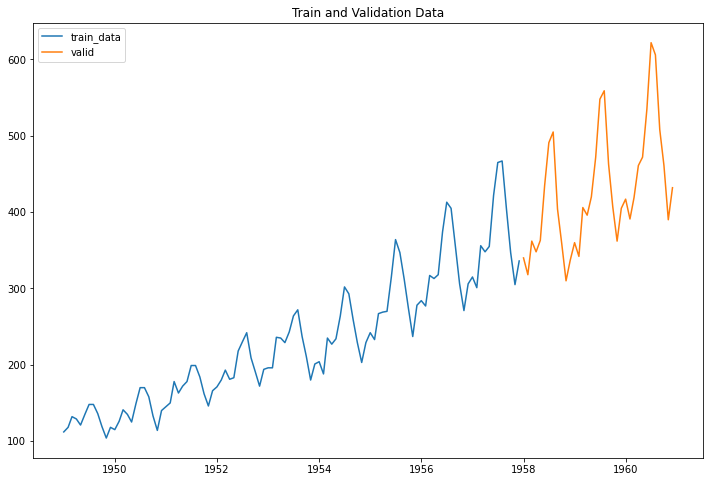

In [56]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index,valid_data, label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

## Stationarity Test

In [57]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [58]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [59]:
adf_test(train_data)

Results of Dickey-Fuller Test:
Test Statistic                  1.002587
p-value                         0.994293
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [60]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [61]:
kpss_test(train_data)

Results of KPSS Test:
Test Statistic            0.857126
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


**The Time Series is Non-Stationary**

## ACF and PACF

In [32]:
from statsmodels.tsa.stattools import acf, pacf

In [44]:
lag_acf = acf(train_data.dropna(), nlags=50) 
lag_pacf = pacf(train_data.dropna(), nlags=50)

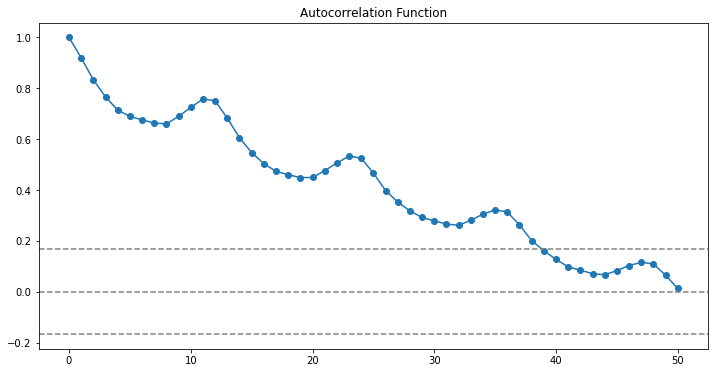

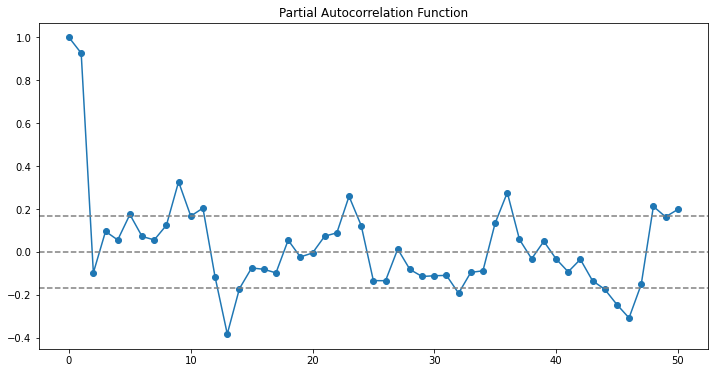

In [45]:
plt.figure(figsize=(12,6))

plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(12,6))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## First Difference

In [62]:
from statsmodels.tsa.api import acf,pacf

In [63]:
diff1=train_data-train_data.shift(1)
diff1

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1957-08-01     2.0
1957-09-01   -63.0
1957-10-01   -57.0
1957-11-01   -42.0
1957-12-01    31.0
Name: #Passengers, Length: 108, dtype: float64

In [64]:
adf_test(diff1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.282546
p-value                         0.177659
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [65]:
kpss_test(diff1.dropna())

Results of KPSS Test:
Test Statistic            0.086881
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [77]:
lag_acf = acf(diff1.dropna(), nlags=50) 
lag_pacf = pacf(diff1.dropna(), nlags=50)

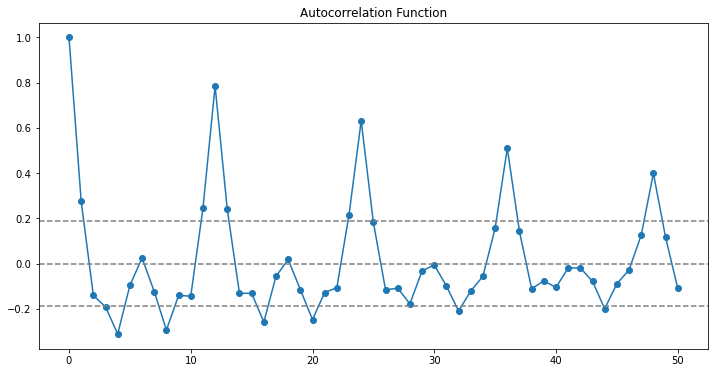

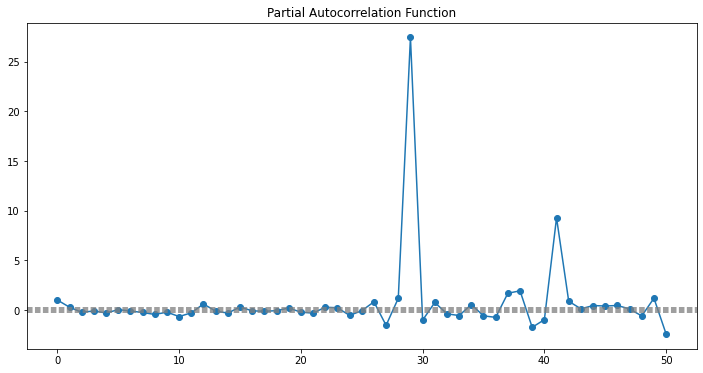

In [78]:
plt.figure(figsize=(12,6))

plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(12,6))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## Seasonal Difference

In [79]:
from statsmodels.tsa.api import acf,pacf

In [80]:
diff1=train_data-train_data.shift(12)
diff1

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
              ... 
1957-08-01    62.0
1957-09-01    49.0
1957-10-01    41.0
1957-11-01    34.0
1957-12-01    30.0
Name: #Passengers, Length: 108, dtype: float64

In [81]:
adf_test(diff1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.124055
p-value                         0.024824
#Lags Used                      2.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [82]:
kpss_test(diff1.dropna())

Results of KPSS Test:
Test Statistic            0.462518
p-value                   0.050208
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [85]:
lag_acf = acf(diff1.dropna(), nlags=45) 
lag_pacf = pacf(diff1.dropna(), nlags=45)

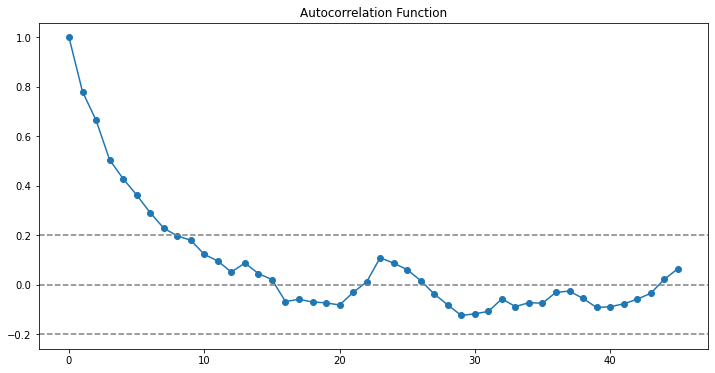

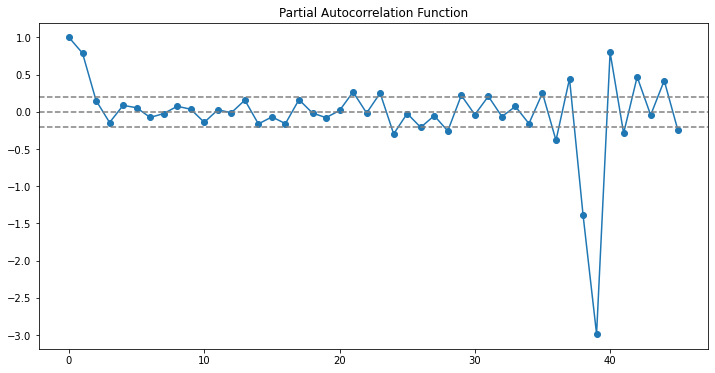

In [86]:
plt.figure(figsize=(12,6))

plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(12,6))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(diff1.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [88]:
from statsmodels.tsa.api import ARIMA,SARIMAX

In [132]:
sarima= SARIMAX(train_data,order=(1,1,0),seasonal_order=(0,1,0,12))
model_fit= sarima.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Tue, 20 Oct 2020   AIC                            704.001
Time:                                    22:12:58   BIC                            709.109
Sample:                                01-01-1949   HQIC                           706.065
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
valid_pred=model_fit.predict(start="1958-01-01",end="1960-12-01",dynamic=True)
valid_pred=list(map(lambda x: 0.01 if x<0 else x,valid_pred))
valid_pred

[345.96447116279694,
 331.73192000683366,
 386.7879922277837,
 378.7744722177487,
 385.77773213269853,
 452.77694610920804,
 495.77713563345554,
 497.7770899357877,
 434.7771009543084,
 377.77709829754707,
 335.7770989381395,
 366.77709878368125,
 376.7415699837209,
 362.50901881877775,
 417.565091041893,
 409.551571031336,
 416.5548309464117,
 483.5540449228908,
 526.5542344471455,
 528.5541887494759,
 465.554199767997,
 408.5541971112355,
 366.5541977518279,
 397.5541975973697,
 407.51866879740936,
 393.2861176324662,
 448.34218985558147,
 440.3286698450244,
 447.3319297601001,
 514.3311437365792,
 557.331333260834,
 559.3312875631643,
 496.3312985816855,
 439.331295924924,
 397.3312965655165,
 428.33129641105825]

In [134]:
np.sqrt(msle(valid_data,valid_pred))

0.04919671544182618

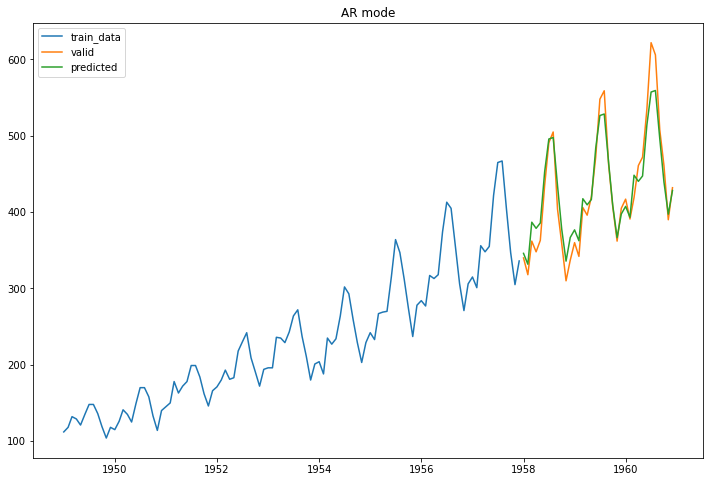

In [135]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index, valid_data, label='valid')
plt.plot(valid_data.index, valid_pred, label='predicted')

plt.legend(loc='best')
plt.title("AR mode")
plt.show()